# 1. Define Objectives and Requirements

Understand the Problem: Clearly define the objectives of the fraud detection system, including the types of fraud to be detected and the desired output (e.g., detailed reports of suspicious transactions).

Gather Requirements: Consult with stakeholders to gather detailed requirements, including regulatory compliance, performance metrics, and integration needs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Collection and Preparation

Collect Data: Gather historical transaction data, including account statements, transaction details, and fraud labels if available.

Data Cleaning: Handle missing values, correct inconsistencies, and remove duplicates.
Feature Engineering: Create and select relevant features for fraud detection (e.g., transaction amount, merchant category, account balance trends).

Data Splitting: Divide the data into training, validation, and test sets.

In [2]:
df = pd.read_csv(r"C:\NARESHIT\Online Payment Fraud Detection.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Transaction_ID:

Description: A unique identifier for each transaction.
Significance: Ensures that each transaction can be uniquely identified and tracked.
Account_ID:

Description: Identifier for the account involved in the transaction.
Significance: Allows tracking of transactions per account, which is useful for identifying patterns and anomalies at the account level.
Transaction_Date:

Description: The date when the transaction occurred.
Significance: Helps in temporal analysis and identifying unusual patterns over time.
Transaction_Amount:

Description: The amount of money involved in the transaction.
Significance: High-value transactions may be more suspicious, especially if they deviate from normal spending patterns.
Merchant_ID:

Description: Unique identifier for the merchant where the transaction took place.
Significance: Identifies where transactions are occurring, which can be crucial for spotting fraudulent patterns related to specific merchants.
Merchant_Name:

Description: Name of the merchant.
Significance: Provides readable merchant information for easier analysis and reporting.
Merchant_Category:

Description: Category of the merchant (e.g., Electronics, Travel).
Significance: Categorizing merchants helps identify unusual transaction types or categories that may indicate fraud.
Location:

Description: Location of the transaction (or "Online").
Significance: Helps in detecting transactions from unusual locations or online transactions that may be suspicious.
Account_Balance:

Description: Balance of the account after the transaction.
Significance: Can indicate whether the transaction is reasonable given the account's balance. Drastic balance changes may be a red flag.
Transaction_Type:

Description: Type of transaction (e.g., Purchase, Transfer).
Significance: Different transaction types might have different fraud patterns. For instance, large transfers might be more suspicious than small purchases.
Previous_Transactions:

Description: Number of transactions made by the account in the last 30 days.
Significance: Helps to understand transaction frequency and spot anomalies in transaction patterns.
Time_of_Day:

Description: Time when the transaction occurred (in HH
format).
Significance: Identifies whether transactions occur at unusual times, which can be an indicator of fraud.
Is_Fraudulent:

Description: Flag indicating if the transaction is fraudulent (Yes/No).
Significance: Provides labeled data for training fraud detection models. It’s the target variable used to determine the presence of fraud.

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            5000 non-null   int64  
 1   type            5000 non-null   object 
 2   amount          5000 non-null   float64
 3   nameOrig        5000 non-null   object 
 4   oldbalanceOrg   5000 non-null   float64
 5   newbalanceOrig  5000 non-null   float64
 6   nameDest        5000 non-null   object 
 7   oldbalanceDest  5000 non-null   float64
 8   newbalanceDest  5000 non-null   float64
 9   isFraud         5000 non-null   int64  
 10  isFlaggedFraud  5000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 429.8+ KB


1. Identify and articulate the challenges or questions derived from the provided scenario.

1. step - represents a unit of time where 1 step equals 1 hour
2. type - type of online transaction
3. amount - the amount of the transaction
4. nameOrig - customer starting the transaction
5. oldbalanceOrg - balance before the transaction
6. newbalanceOrig - balance after the transaction
7. nameDest - recipient of the transaction
8. oldbalanceDest - initial balance of recipient before the transaction
9. newbalanceDest - the new balance of recipient after the transaction
10. isFraud - fraud transaction

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,5,CASH_IN,67017.13,C1000600589,3942544.19,4009561.32,C1163619825,118844.67,51827.53,0,0
4996,5,CASH_IN,122744.28,C277549599,4009561.32,4132305.60,C1850042097,207106.34,84362.06,0,0
4997,5,CASH_IN,414729.24,C1185631996,4132305.60,4547034.84,C991505714,2109808.94,1695079.69,0,0
4998,5,CASH_IN,328776.10,C804559024,4547034.84,4875810.94,C977993101,1019467.84,962737.60,0,0


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
for i in df:
    a = df[i].value_counts()
    a = pd.DataFrame(a)
    print(a)
    print('-'*50)

   step
1  2708
2  1014
4   565
3   552
5   161
--------------------------------------------------
          type
PAYMENT   2587
CASH_IN   1082
CASH_OUT   631
TRANSFER   437
DEBIT      263
--------------------------------------------------
            amount
35063.63         2
2930418.44       2
1277212.77       2
22877.00         2
120074.73        2
...            ...
12762.36         1
6522.37          1
12429.59         1
6577.30          1
50535.87         1

[4979 rows x 1 columns]
--------------------------------------------------
             nameOrig
C1231006815         1
C1519482659         1
C773059332          1
C1621615881         1
C1086508626         1
...               ...
C715289224          1
C47268007           1
C78265654           1
C1921553024         1
C189993695          1

[5000 rows x 1 columns]
--------------------------------------------------
             oldbalanceOrg
0.00                  1067
10300000.00              5
10500000.00              5
10000000

In [7]:
cont = df[['amount', 'oldbalanceDest', 'newbalanceDest','newbalanceOrig']]
c = cont.columns           

In [8]:
dis = df[['type','step']]
d = dis.columns

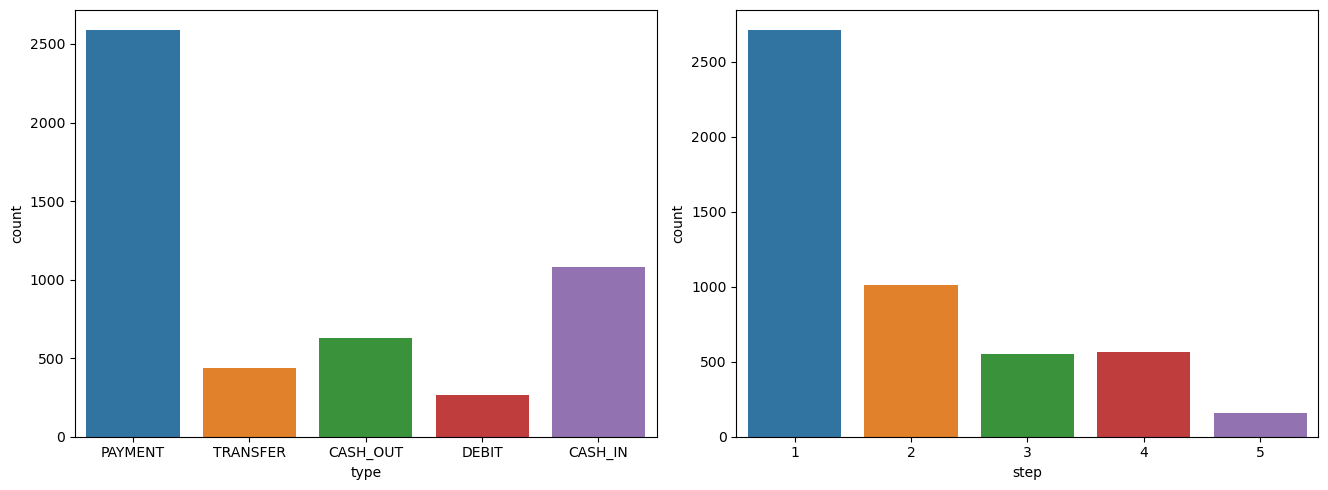

In [9]:
plt.figure(figsize = (20,5))

for i in range(len(d)):
    plt.subplot(1,3,i+1)
    sns.countplot(x = d[i], data = df);
plt.tight_layout()

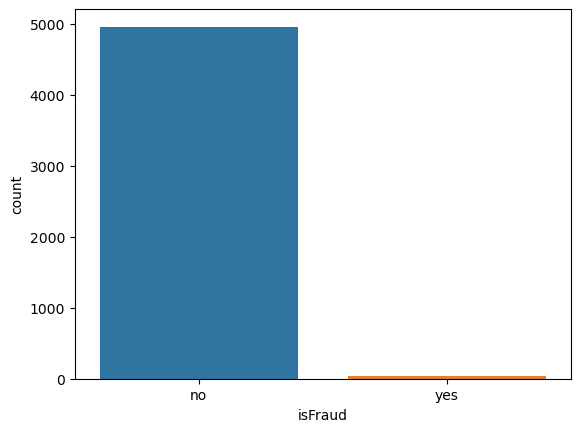

In [97]:
sns.countplot(x = df['isFraud']);

In [98]:
df['isFraud'].value_counts()

no     4960
yes      40
Name: isFraud, dtype: int64

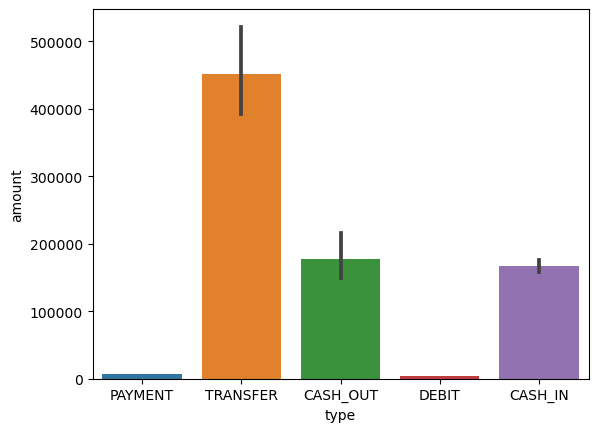

In [10]:
sns.barplot(x='type', y='amount', data=df);

C:\Users\PALLAWI WAGDRE\AppData\Local\Temp\ipykernel_21260\2169038951.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['step'], bins=50);


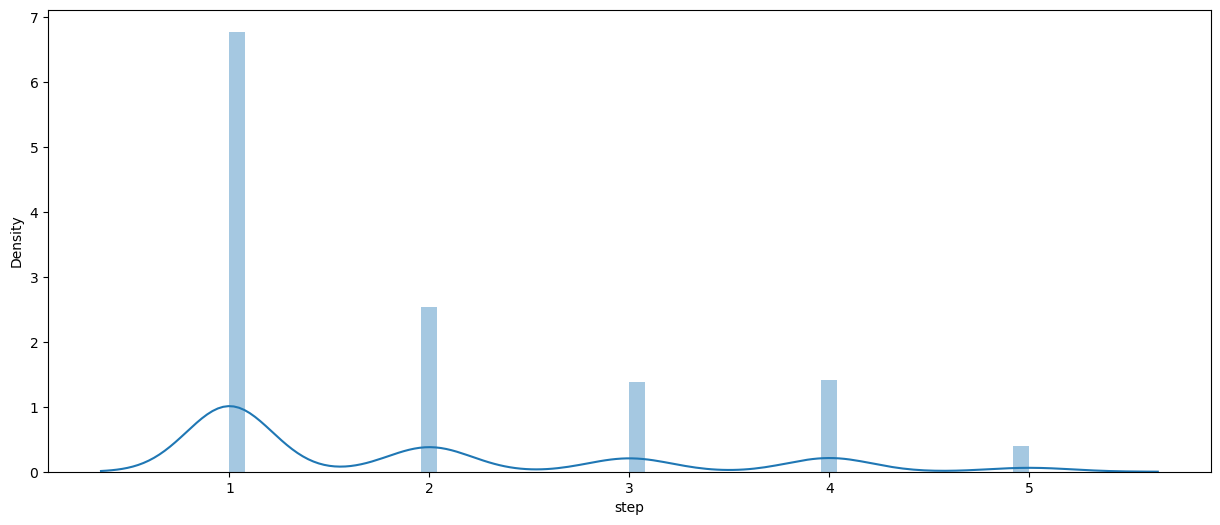

In [11]:
plt.figure(figsize=(15, 6))
sns.distplot(df['step'], bins=50);

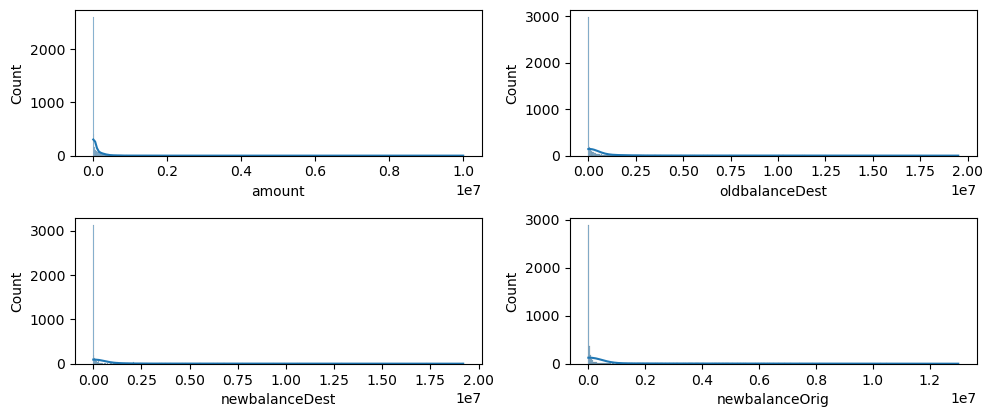

In [12]:
plt.figure(figsize = (10,8))

for i in range(len(c)):
    plt.subplot(4,2,i+1)
    sns.histplot(x=c[i], kde = True,data = df);
plt.tight_layout()
# plt.savefig('hist.png')

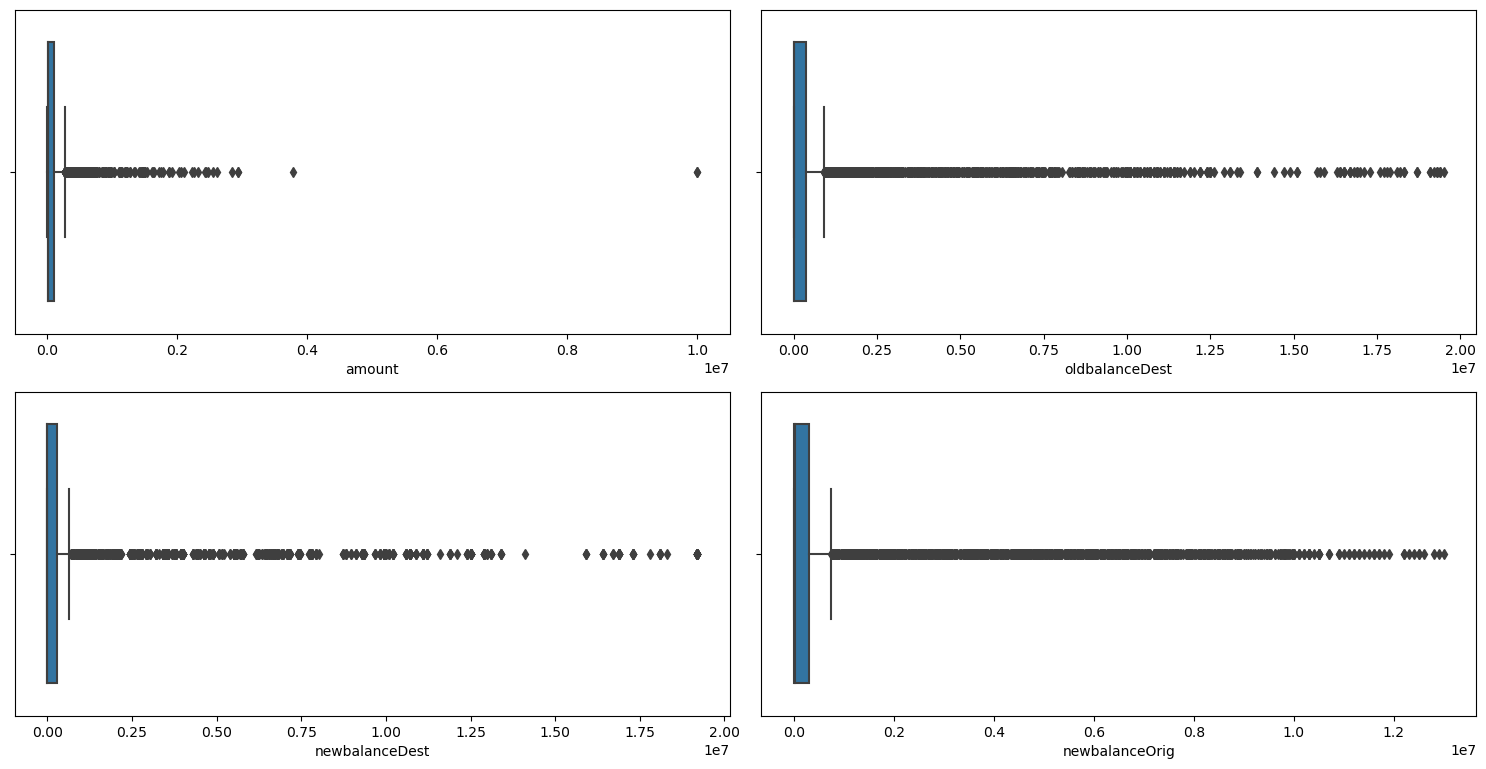

In [13]:
plt.figure(figsize = (15,15))

for i in range(len(c)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = c[i], data = df)
plt.tight_layout()

In [14]:
df.drop('isFlaggedFraud', axis =1, inplace = True)

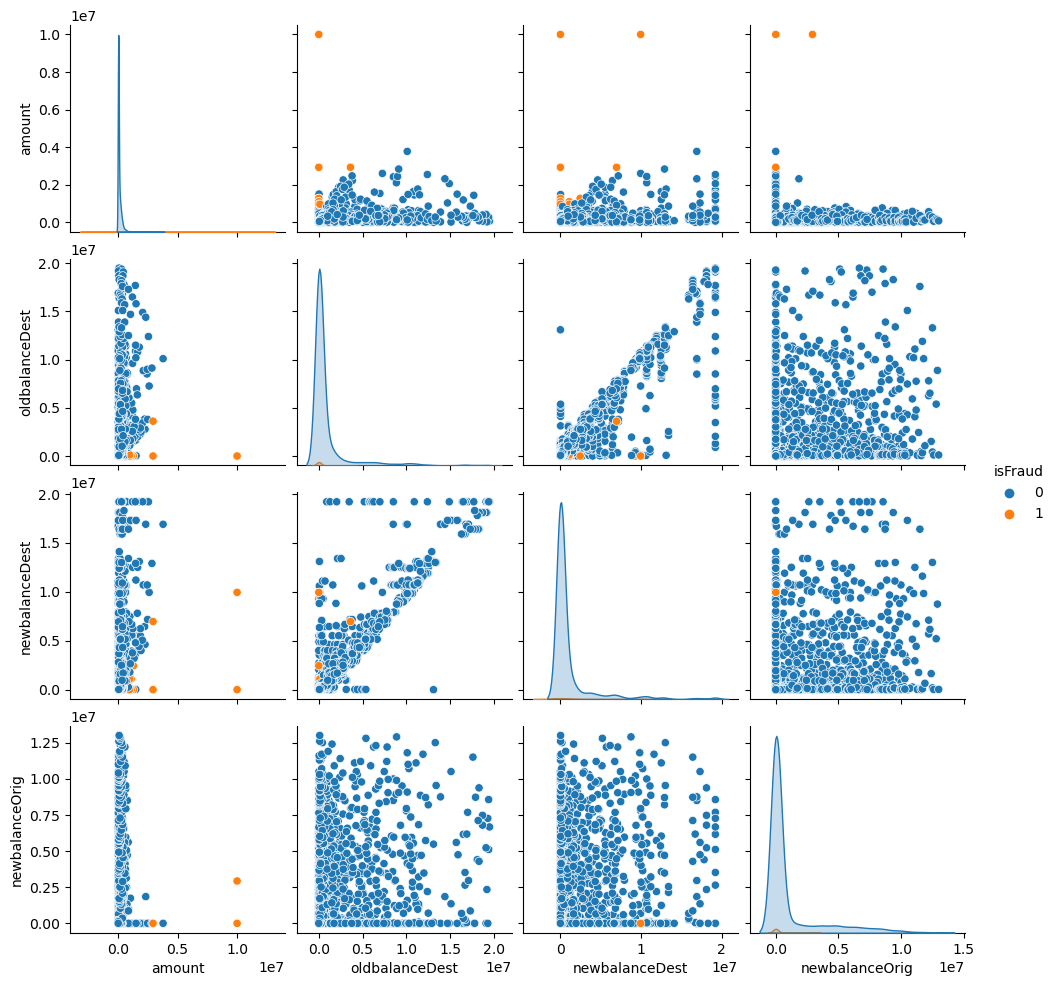

In [15]:
sns.pairplot(vars = c, hue = 'isFraud',data = df);

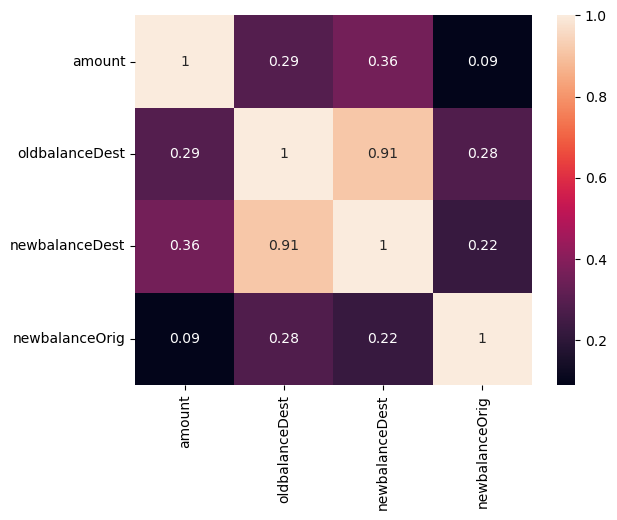

In [16]:
# plt.figure(figsize = (18,10))
sns.heatmap(cont.corr(), annot = True);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Number of transactions')

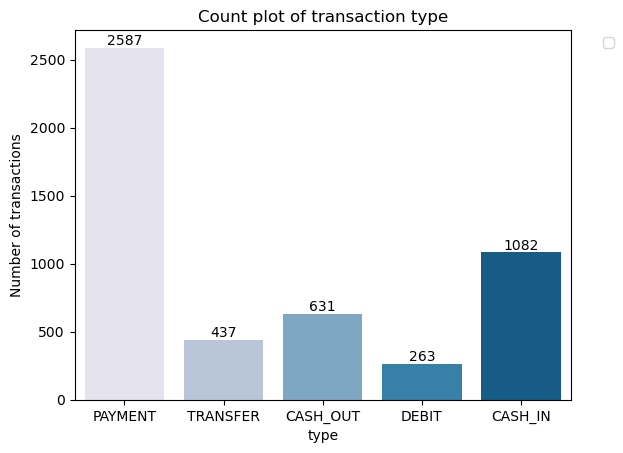

In [17]:
ax = sns.countplot(x='type', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

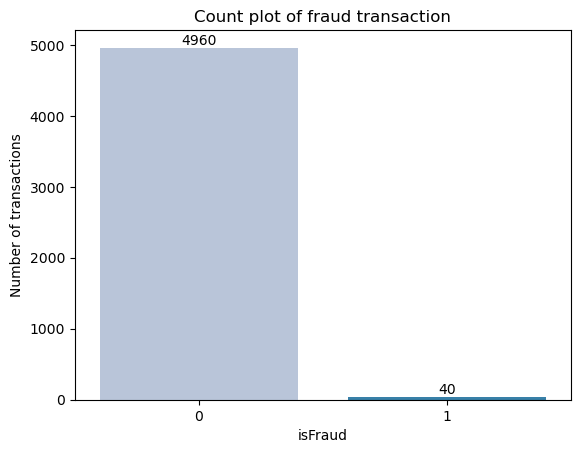

In [18]:
ax = sns.countplot(x='isFraud', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

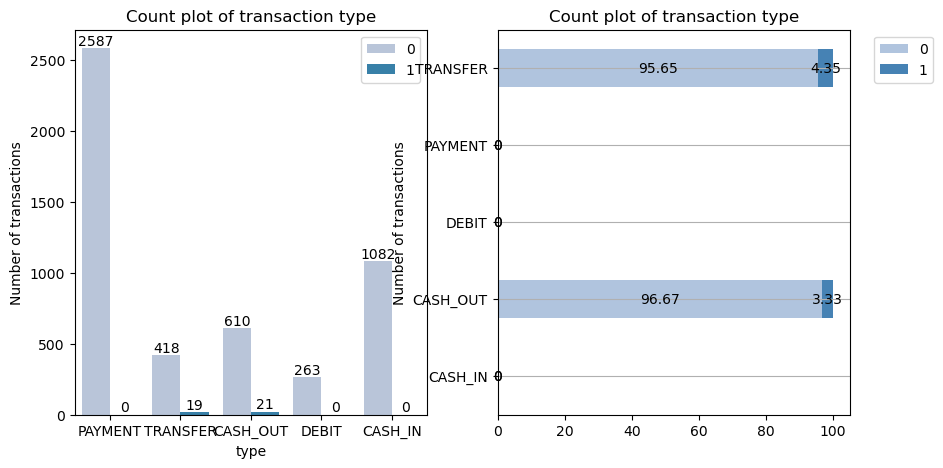

In [19]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

Text(0, 0.5, 'Number of transactions')

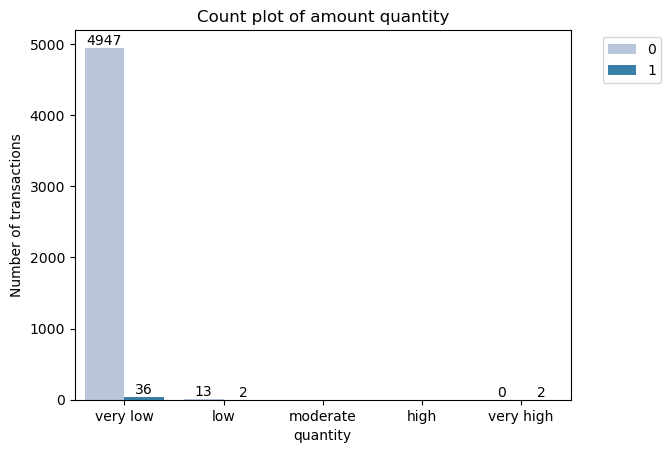

In [20]:
df['quantity'] = pd.cut(df['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

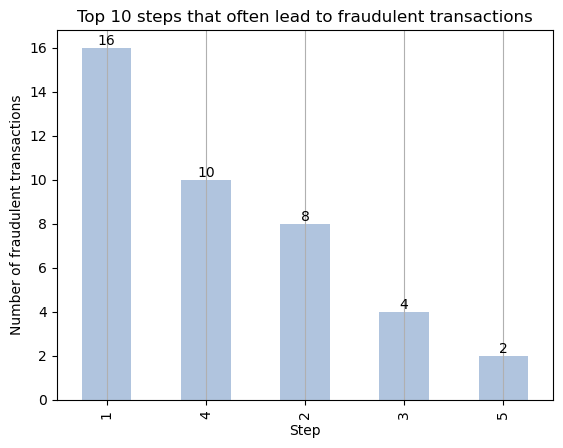

In [21]:
df1 = df[df['isFraud']==1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, df2

Text(0.5, 0, 'Initial customers pre-transaction balance amount')

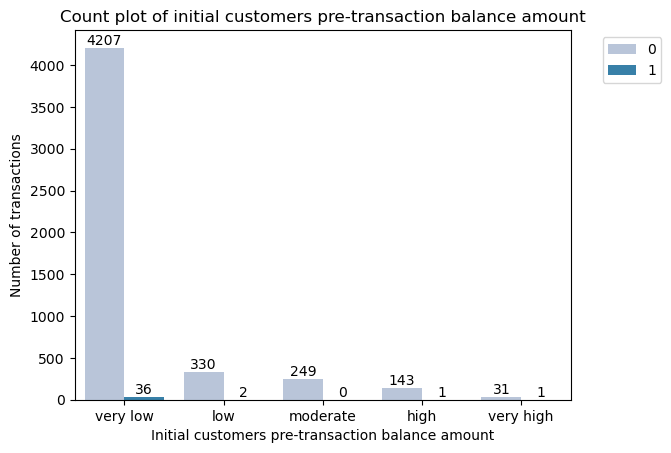

In [22]:
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

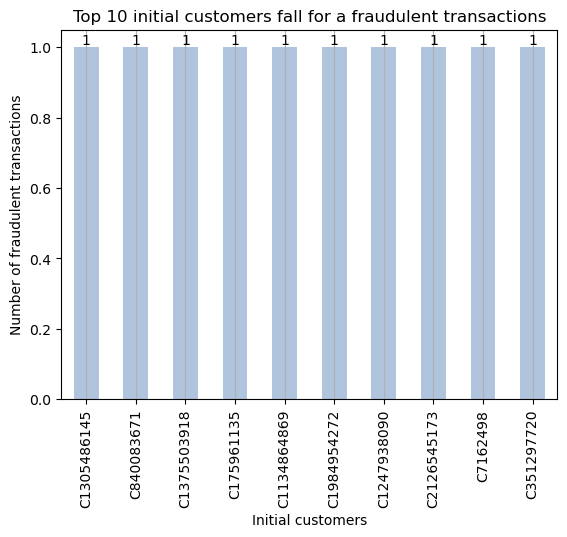

In [23]:
df2 = df1['nameOrig'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, df2

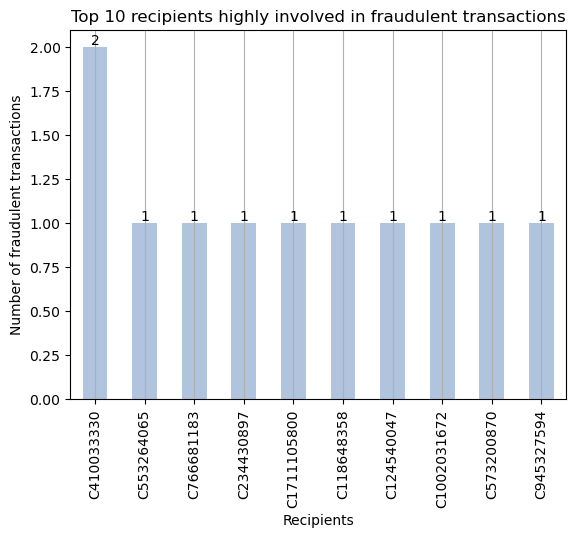

In [24]:
df2 = df1['nameDest'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')

del ax, df2

Text(0.5, 0, 'Recipient pre-transaction balance amount')

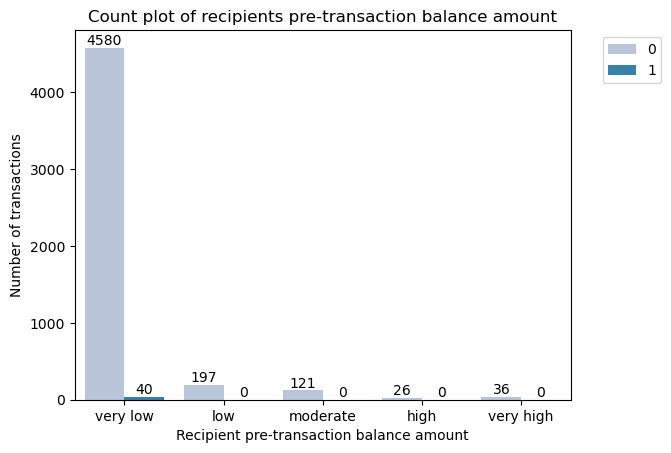

In [25]:
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

Text(0.5, 1.0, 'Correlation')

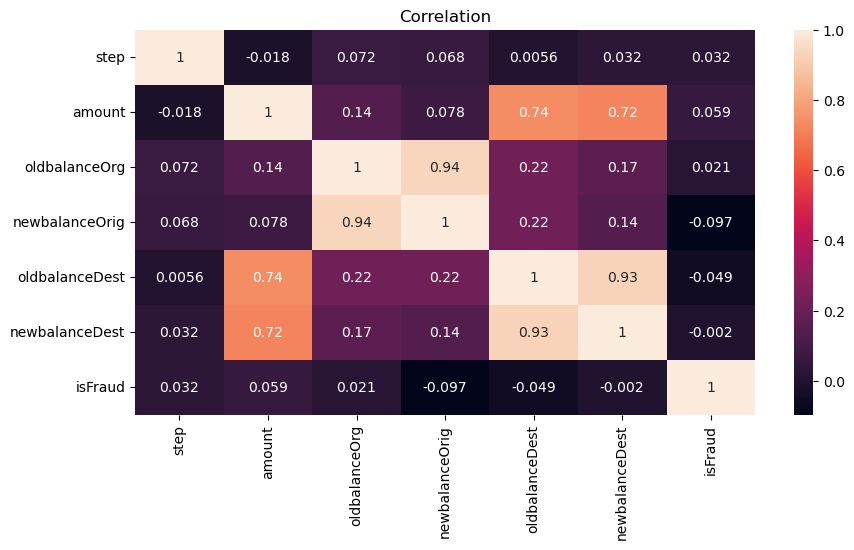

In [26]:
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the Spearman correlation matrix
corr_matrix = df_numeric.corr('spearman')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 5))

# Draw the heatmap
sns.heatmap(corr_matrix, cbar=True, annot=True)

# Add a title
plt.title('Correlation')

In [27]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000
mean,1.891400,1.015176e+05,1.042517e+06,1.064332e+06,9.182340e+05,1.065315e+06,0.008000
std,1.175705,3.009623e+05,2.301872e+06,2.343668e+06,2.542204e+06,2.923836e+06,0.089093
min,1.000000,6.420000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.000000,3.734922e+03,5.722500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,1.000000,1.095855e+04,2.655056e+04,1.814185e+04,0.000000e+00,0.000000e+00,0.000000
75%,3.000000,1.086046e+05,2.957183e+05,3.003207e+05,3.638475e+05,2.701108e+05,0.000000
max,5.000000,1.000000e+07,1.290000e+07,1.300000e+07,1.950000e+07,1.920000e+07,1.000000


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['oldbalanceOrg'] = le.fit_transform(df['oldbalanceOrg'])
df['newbalanceOrig'] = le.fit_transform(df['newbalanceOrig'])

In [35]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,quantity,oldbalanceOrg_amt,oldbalanceDest_amt
0,1,3,9839.64,C1231006815,2440,1785,M1979787155,0.0,0.0,0,very low,very low,very low
1,1,3,1864.28,C1666544295,1175,768,M2044282225,0.0,0.0,0,very low,very low,very low
2,1,4,181.00,C1305486145,60,0,C553264065,0.0,0.0,1,very low,very low,very low
3,1,1,181.00,C840083671,60,0,C38997010,21182.0,0.0,1,very low,very low,very low
4,1,3,11668.14,C2048537720,1717,1023,M1230701703,0.0,0.0,0,very low,very low,very low


In [36]:
df.drop(columns = ['nameOrig','nameDest'],axis = 1, inplace = True)

In [37]:
df['quantity'] = le.fit_transform(df['quantity'])
df['oldbalanceOrg_amt'] = le.fit_transform(df['oldbalanceOrg_amt'])
df['oldbalanceDest_amt'] = le.fit_transform(df['oldbalanceDest_amt'])

In [43]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,quantity,oldbalanceOrg_amt,oldbalanceDest_amt
0,1,3,9839.64,2440,1785,0.0,0.0,0,2,4,4
1,1,3,1864.28,1175,768,0.0,0.0,0,2,4,4
2,1,4,181.00,60,0,0.0,0.0,1,2,4,4
3,1,1,181.00,60,0,21182.0,0.0,1,2,4,4
4,1,3,11668.14,1717,1023,0.0,0.0,0,2,4,4


In [40]:
X = df.drop(columns = ['isFraud','oldbalanceOrg','oldbalanceDest'], axis = 1)
y = df['isFraud']

In [94]:
X.head()

,step,type,amount,newbalanceOrig,newbalanceDest,quantity,oldbalanceOrg_amt,oldbalanceDest_amt
0,1,3,9839.64,1785,0.0,2,4,4
1,1,3,1864.28,768,0.0,2,4,4
2,1,4,181.00,0,0.0,2,4,4
3,1,1,181.00,0,0.0,2,4,4
4,1,3,11668.14,1023,0.0,2,4,4


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings("ignore")
Train = []
Test = []
CV = []

for i in range(0,201):
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = i)
    LR = LogisticRegression()
    LR.fit(X_train,y_train)
    ypred_train = LR.predict(X_train)
    ypred_test = LR.predict(X_test)
    Train.append(accuracy_score(y_train,ypred_train))
    Test.append(accuracy_score(y_test,ypred_test))
    CV.append(cross_val_score(LR,X_train,y_train,cv = 5).mean())
    
em = pd.DataFrame({"Train":Train,"Test":Test,"CV":CV})
gm = em[(abs(em["Train"]-em["Test"])<=0.05) & (abs(em["Test"]-em["CV"])<=0.05)]
print("Best Random State Number:",gm[gm["Test"]==gm["Test"].max()].index.to_list()[0])

Best Random State Number: 6


In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state= 6)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)


X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

In [46]:
from sklearn.impute import SimpleImputer
def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    
    for name, model in classifiers.items():
        print('{}:'.format(name))
        
        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
        
        for score in scoring:
            scores = cross_val_score(model, X_imputed, y, scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))
            
        print('\n')

In [48]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(class_weight='balanced', random_state=6),
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=6)
}

In [49]:
model_comparison_evaluate(classifiers, X_train, y_train)

K-Fold Cross-Validation:

Random Forest Classifier:
Mean accuracy score: 0.908 (0.113)
Mean precision score: 0.906 (0.080)
Mean recall score: 0.914 (0.171)
Mean f1 score: 0.905 (0.123)
Mean roc_auc score: 0.962 (0.056)


Logistic Regression:
Mean accuracy score: 0.767 (0.082)
Mean precision score: 0.743 (0.098)
Mean recall score: 0.843 (0.139)
Mean f1 score: 0.779 (0.078)
Mean roc_auc score: 0.902 (0.027)




Random Forest Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       1.00      0.84      0.92       992
    Fraud [1]       0.05      1.00      0.09         8

     accuracy                           0.84      1000
    macro avg       0.52      0.92      0.50      1000
 weighted avg       0.99      0.84      0.91      1000
 



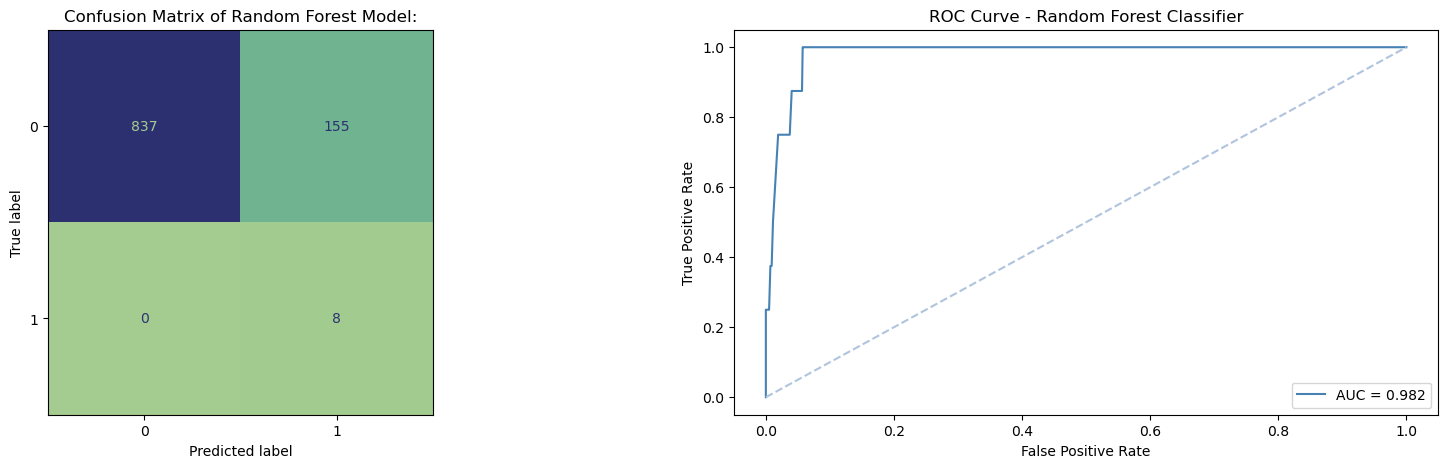

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are already defined

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the model
model = RandomForestClassifier(class_weight='balanced', random_state=6)
model.fit(X_train_imputed, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_imputed)
y_pred_score = model.predict_proba(X_test_imputed)[:, 1]

print('Random Forest Classifier:')
print(classification_report(y_test, y_pred, labels=[0, 1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Confusion Matrix
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)
ax[1].set_title('ROC Curve - Random Forest Classifier')
ax[1].plot(fpr, tpr, label='AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0, 1], [0, 1], '--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

plt.show()

In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state =80)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83       996
           1       0.01      0.75      0.02         4

    accuracy                           0.71      1000
   macro avg       0.50      0.73      0.43      1000
weighted avg       0.99      0.71      0.83      1000

[[707 289]
 [  1   3]]


In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 85)
LR = LogisticRegression()
LR.fit(X_train,y_train)
ypred_train = LR.predict(X_train)
ypred_test = LR.predict(X_test)

In [57]:
print('Train Accuracy =',accuracy_score(y_train,ypred_train))
print('Test Accuracy =',accuracy_score(y_test,ypred_test))
print("Cross Validatioon Score =",cross_val_score(LR,X,y,cv = 5).mean())

Train Accuracy = 0.9915
Test Accuracy = 0.996
Cross Validatioon Score = 0.9118


In [58]:
from sklearn.metrics import confusion_matrix
sm = confusion_matrix(y_test,ypred_test)
sm

array([[996,   0],
       [  4,   0]], dtype=int64)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       996
           1       0.00      0.00      0.00         4

    accuracy                           1.00      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.99      1.00      0.99      1000



In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
ypre_train = knn.predict(X_train)
ypre_test = knn.predict(X_test)

In [63]:
print('Accuracy Train = ',accuracy_score(y_train,ypre_train))
print('Accuracy Train = ',accuracy_score(y_test,ypre_test))
print('Cross Validation Score = ', cross_val_score(knn,X_train,y_train, cv = 5).mean())

Accuracy Train =  0.9915
Accuracy Train =  0.996
Cross Validation Score =  0.99075


In [64]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {"n_neighbors": list(range(1,100))}

from sklearn.model_selection import GridSearchCV
cv_classifier = GridSearchCV(estimator,param_grid,cv =5,scoring = "accuracy")

cv_classifier.fit(X_train,y_train)

cv_classifier.best_params_

{'n_neighbors': 4}

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 4)
knn.fit(X_train,y_train)
ypre_train = knn.predict(X_train)
ypre_test = knn.predict(X_test)

print('Accuracy Train = ',accuracy_score(y_train,ypre_train))
print('Accuracy Train = ',accuracy_score(y_test,ypre_test))
print('Cross Validation Score = ', cross_val_score(knn,X_train,y_train, cv = 5).mean())

Accuracy Train =  0.99125
Accuracy Train =  0.997
Cross Validation Score =  0.991


In [68]:
df['isFraud'] = df['isFraud'].replace({0:'no',1:'yes'})

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train,y_train)

pred_train = dt_default.predict(X_train)
pred_test = dt_default.predict(X_test)

print(accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_test))
print(cross_val_score(dt_default,X,y,cv =5).mean())

1.0
0.992
0.8488


In [76]:
estimator = DecisionTreeClassifier()

param_grid = {"criterion" : ["gini","entropy"],"max_depth":[1,2,3,4,5,6]}

g = GridSearchCV(estimator,param_grid,scoring = "accuracy",cv = 5)
g.fit(X_train,y_train)
g.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [77]:
dt_default = DecisionTreeClassifier(random_state = 0,criterion = "entropy",max_depth = 4)
dt_default.fit(X_train,y_train)

ped_train = dt_default.predict(X_train)
ped_test = dt_default.predict(X_test)

print('Train =',accuracy_score(y_train,ped_train))
print('Test = ',accuracy_score(y_test,ped_test))
print('Cross Validation Score = ',cross_val_score(dt_default,X,y,cv =5).mean())

Train = 0.99325
Test =  0.996
Cross Validation Score =  0.9914


In [78]:
dt = confusion_matrix(y_test,ped_test)
dt

array([[996,   0],
       [  4,   0]], dtype=int64)

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train,y_train)

ypr_train= rfc.predict(X_train)
ypr_test = rfc.predict(X_test)

print("Train Accuracy = ",accuracy_score(y_train,ypr_train))
print("Test Accuracy = ",accuracy_score(y_test,ypr_test))
print("Cross Validation Score = ",cross_val_score(rfc,X,y,cv = 5).mean())

Train Accuracy =  1.0
Test Accuracy =  0.999
Cross Validation Score =  0.9907999999999999


In [84]:
estimator = RandomForestClassifier()

param_grid = {"n_estimators" : list(range(0,50)),"max_depth":[1,2,3,4,5,6]}

g = GridSearchCV(estimator,param_grid,scoring = "accuracy",cv = 5)
g.fit(X_train,y_train)
g.best_params_

KeyboardInterrupt: 

In [88]:
rfc = RandomForestClassifier(n_estimators = 18,max_depth = 8)
rfc.fit(X_train,y_train)

ypr_train= rfc.predict(X_train)
ypr_test = rfc.predict(X_test)

print("Train Accuracy = ",accuracy_score(y_train,ypr_train))
print("Test Accuracy = ",accuracy_score(y_test,ypr_test))
print("Cross Validation Score = ",cross_val_score(rfc,X,y,cv = 5).mean())

Train Accuracy =  0.99525
Test Accuracy =  0.997
Cross Validation Score =  0.9812000000000001


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

# Feature scaling (optional, depending on the algorithm)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate cross-validation score
    cross_val_score_mean = cross_val_score(model, X_train, y_train, cv=5).mean()
    
    # Store the results
    results[model_name] = {'Accuracy': accuracy, 'Cross-Validation Score': cross_val_score_mean}
    
    # Print results
    print(f'{model_name} Accuracy: {accuracy:.4f}')
    print(f'{model_name} Cross-Validation Score: {cross_val_score_mean:.4f}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('--------------------------------------------------')
    
# Compare the results
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)


Logistic Regression Accuracy: 0.4350
Logistic Regression Cross-Validation Score: 0.9918
[[432 564]
 [  1   3]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60       996
           1       0.01      0.75      0.01         4

    accuracy                           0.43      1000
   macro avg       0.50      0.59      0.31      1000
weighted avg       0.99      0.43      0.60      1000

--------------------------------------------------
Random Forest Accuracy: 0.4940
Random Forest Cross-Validation Score: 0.9925
[[494 502]
 [  4   0]]
              precision    recall  f1-score   support

           0       0.99      0.50      0.66       996
           1       0.00      0.00      0.00         4

    accuracy                           0.49      1000
   macro avg       0.50      0.25      0.33      1000
weighted avg       0.99      0.49      0.66      1000

--------------------------------------------------
Support Vector Machine Accuracy: 0

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

# Feature scaling (optional, depending on the algorithm)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models and hyperparameter grids
models_and_parameters = {
    'Logistic Regression': (LogisticRegression(), {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    # 'Support Vector Machine': (SVC(), {
    #     'C': [0.1, 1, 10],
    #     'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
    # }),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {
        'n_neighbors': list(range(1, 50)),
        'weights': ['uniform', 'distance']
    }),
    'Naive Bayes': (GaussianNB(), None),  # No hyperparameters to tune
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    })
}

# Train and evaluate each model with hyperparameter tuning
results = {}

for model_name, (model, param_grid) in models_and_parameters.items():
    if param_grid:  # Check if the model has parameters to tune
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        best_model = model.fit(X_train, y_train)  # No hyperparameters to tune, just fit the model
        best_params = "N/A"

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate cross-validation score
    cross_val_score_mean = cross_val_score(best_model, X_train, y_train, cv=5).mean()

    results[model_name] = {
        'Accuracy': accuracy,
        'Cross-Validation Score': cross_val_score_mean,
        'Best Parameters': best_params
    }

    print(f'{model_name} Best Accuracy: {accuracy:.4f}')
    print(f'Cross-Validation Score: {cross_val_score_mean:.4f}')
    print(f'Best Parameters: {best_params}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('--------------------------------------------------')

# Compare the results
results_df = pd.DataFrame(results).T
print(results_df)


Logistic Regression Best Accuracy: 0.9970
Cross-Validation Score: 0.9918
Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
[[996   0]
 [  3   1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       996
           1       1.00      0.25      0.40         4

    accuracy                           1.00      1000
   macro avg       1.00      0.62      0.70      1000
weighted avg       1.00      1.00      1.00      1000

--------------------------------------------------
Random Forest Best Accuracy: 0.9970
Cross-Validation Score: 0.9933
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
[[996   0]
 [  3   1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       996
           1       1.00      0.25      0.40         4

    accuracy                           1.00      1000
   macro avg       1.00      0.62      0.70      1000
weighted avg       1.00      1.00     

In [146]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=50, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

# Feature scaling (optional, depending on the algorithm)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models and hyperparameter grids
models_and_parameters = {
    'AdaBoost': (AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    }),
    'XGBoost': (xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'gamma': [50,100,200]
    })
}

# Train and evaluate each model with hyperparameter tuning
results = {}

for model_name, (model, param_grid) in models_and_parameters.items():
    if param_grid:  # Check if the model has parameters to tune
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        best_model = model.fit(X_train, y_train)  # No hyperparameters to tune, just fit the model
        best_params = "N/A"

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate cross-validation score
    cross_val_score_mean = cross_val_score(best_model, X_train, y_train, cv=5).mean()

    results[model_name] = {
        'Accuracy': accuracy,
        'Cross-Validation Score': cross_val_score_mean,
        'Best Parameters': best_params
    }

    print(f'{model_name} Best Accuracy: {accuracy:.4f}')
    print(f'Cross-Validation Score: {cross_val_score_mean:.4f}')
    print(f'Best Parameters: {best_params}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('--------------------------------------------------')

# Compare the results
results_df = pd.DataFrame(results).T
print(results_df)


AdaBoost Best Accuracy: 0.9970
Cross-Validation Score: 0.9925
Best Parameters: {'learning_rate': 1, 'n_estimators': 200}
[[996   0]
 [  3   1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       996
           1       1.00      0.25      0.40         4

    accuracy                           1.00      1000
   macro avg       1.00      0.62      0.70      1000
weighted avg       1.00      1.00      1.00      1000

--------------------------------------------------
Gradient Boosting Best Accuracy: 0.9970
Cross-Validation Score: 0.9918
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
[[994   2]
 [  1   3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       996
           1       0.60      0.75      0.67         4

    accuracy                           1.00      1000
   macro avg       0.80      0.87      0.83      1000
weighted avg       1.00      1.00  

In [145]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=50, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [134]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,quantity,oldbalanceOrg_amt,oldbalanceDest_amt,cluster,cluster_hier,cluster_db
0,1,3,9839.64,2440,1785,0.0,0.0,no,2,4,4,0,4,-1
1,1,3,1864.28,1175,768,0.0,0.0,no,2,4,4,0,4,-1
2,1,4,181.00,60,0,0.0,0.0,yes,2,4,4,0,4,-1
3,1,1,181.00,60,0,21182.0,0.0,yes,2,4,4,0,4,-1
4,1,3,11668.14,1717,1023,0.0,0.0,no,2,4,4,0,4,-1


In [135]:
X.head()

,step,type,amount,newbalanceOrig,newbalanceDest,quantity,oldbalanceOrg_amt,oldbalanceDest_amt,cluster
0,1,3,9839.64,1785,0.0,2,4,4,0
1,1,3,1864.28,768,0.0,2,4,4,0
2,1,4,181.00,0,0.0,2,4,4,0
3,1,1,181.00,0,0.0,2,4,4,0
4,1,3,11668.14,1023,0.0,2,4,4,0


In [148]:
# New data should be in the same format as X
new_data = pd.DataFrame({
    'step': [1],
    'type': [3], # Make sure this is the correct type or encoded value
    'amount':[11000],
    'newbalanceOrig': [1785],
    'newbalanceDest': [0.0],
    'quantity': [2],
    'oldbalanceOrg_amt': [4],
    'oldbalanceDest_amt': [4]
    })

# Apply the same encoding and scaling to new data
new_data = pd.get_dummies(new_data)
new_data = scaler.transform(new_data)

# Make a prediction
prediction = knn.predict(new_data)
print(f'Predicted amount: {prediction}')


Predicted amount: [0]


# Clustering

In [116]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,quantity,oldbalanceOrg_amt,oldbalanceDest_amt,cluster,cluster_hier,cluster_db
0,1,3,9839.64,2440,1785,0.0,0.0,no,2,4,4,0,4,-1
1,1,3,1864.28,1175,768,0.0,0.0,no,2,4,4,0,4,-1
2,1,4,181.00,60,0,0.0,0.0,yes,2,4,4,0,4,-1
3,1,1,181.00,60,0,21182.0,0.0,yes,2,4,4,0,4,-1
4,1,3,11668.14,1717,1023,0.0,0.0,no,2,4,4,0,4,-1


In [100]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)

[4.318832875654851e+16, 1.041293401392898e+16, 4693814794046180.0, 2551774563881127.5, 1551404896770459.8, 1036286757317566.5, 851680392487900.5, 739617513928644.8, 642468191396459.8, 548986206197529.0]


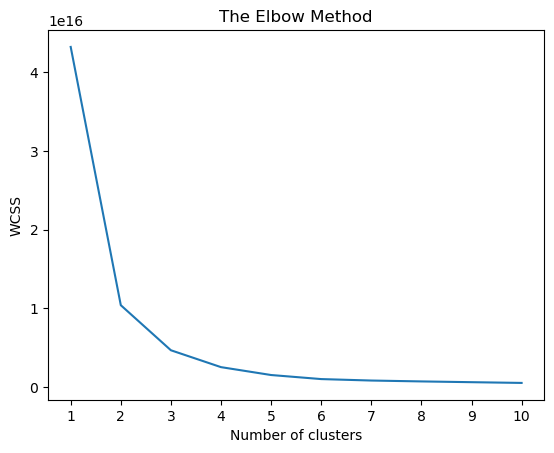

In [101]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [102]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 4, 4, 0])

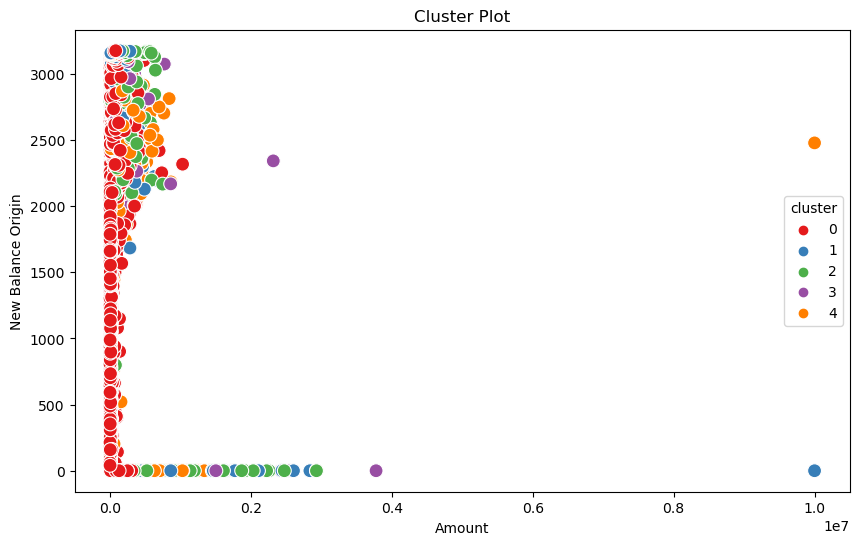

In [120]:
# Scatter plot using matplotlib
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='amount', y='newbalanceOrig', hue='cluster', palette='Set1', s=100)

# Add titles and labels
plt.title('Cluster Plot')
plt.xlabel('Amount')
plt.ylabel('New Balance Origin')

# Show the plot
plt.show()


In [118]:
X["cluster"] = pd.DataFrame(y_kmeans)
X.head()

,step,type,amount,newbalanceOrig,newbalanceDest,quantity,oldbalanceOrg_amt,oldbalanceDest_amt,cluster
0,1,3,9839.64,1785,0.0,2,4,4,0
1,1,3,1864.28,768,0.0,2,4,4,0
2,1,4,181.00,0,0.0,2,4,4,0
3,1,1,181.00,0,0.0,2,4,4,0
4,1,3,11668.14,1023,0.0,2,4,4,0


In [104]:
df["cluster"].unique()

array([0, 4, 2, 3, 1])

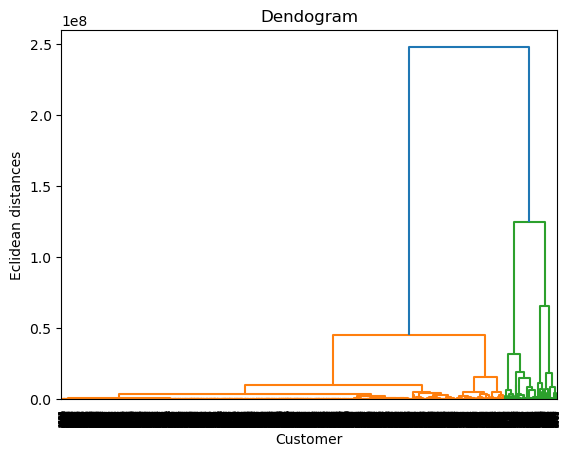

In [105]:
import scipy.cluster.hierarchy as sch

data = sch.linkage(X, method = 'ward')

dendrogram = sch.dendrogram(data)

plt.title("Dendogram")
plt.xlabel("Customer")
plt.ylabel("Eclidean distances")
plt.show()

In [115]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X)
y_hc

array([4, 4, 4, ..., 2, 2, 4], dtype=int64)

In [113]:
df["cluster_hier"] = pd.DataFrame(y_hc)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,quantity,oldbalanceOrg_amt,oldbalanceDest_amt,cluster,cluster_hier,cluster_db
0,1,3,9839.64,2440,1785,0.0,0.0,no,2,4,4,0,4,-1
1,1,3,1864.28,1175,768,0.0,0.0,no,2,4,4,0,4,-1
2,1,4,181.00,60,0,0.0,0.0,yes,2,4,4,0,4,-1
3,1,1,181.00,60,0,21182.0,0.0,yes,2,4,4,0,4,-1
4,1,3,11668.14,1717,1023,0.0,0.0,no,2,4,4,0,4,-1


In [108]:
df["cluster_hier"].unique()

array([4, 2, 0, 3, 1], dtype=int64)

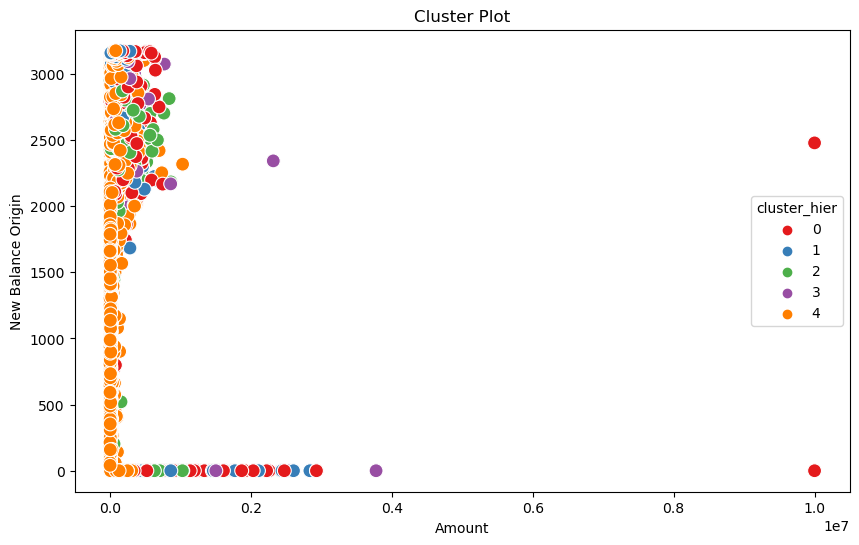

In [125]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='amount', y='newbalanceOrig', hue='cluster_hier', palette='Set1', s=100)

# Add titles and labels
plt.title('Cluster Plot')
plt.xlabel('Amount')
plt.ylabel('New Balance Origin')

# Show the plot
plt.show()


In [109]:
from sklearn.cluster import DBSCAN
for i in range(1,11):
    for j in range(3,11):
    
        dbs = DBSCAN(eps = i,min_samples = j)
        y_dbs = dbs.fit_predict(X)
        f = pd.Series(y_dbs)
        l = len(f.unique())
        print(i,j,l)

1 3 1
1 4 1
1 5 1
1 6 1
1 7 1
1 8 1
1 9 1
1 10 1
2 3 5
2 4 1
2 5 1
2 6 1
2 7 1
2 8 1
2 9 1
2 10 1
3 3 9
3 4 2
3 5 1
3 6 1
3 7 1
3 8 1
3 9 1
3 10 1
4 3 14
4 4 2
4 5 2
4 6 1
4 7 1
4 8 1
4 9 1
4 10 1
5 3 23
5 4 2
5 5 2
5 6 1
5 7 1
5 8 1
5 9 1
5 10 1
6 3 33
6 4 6
6 5 2
6 6 1
6 7 1
6 8 1
6 9 1
6 10 1
7 3 43
7 4 8
7 5 4
7 6 1
7 7 1
7 8 1
7 9 1
7 10 1
8 3 55
8 4 9
8 5 4
8 6 1
8 7 1
8 8 1
8 9 1
8 10 1
9 3 62
9 4 14
9 5 4
9 6 1
9 7 1
9 8 1
9 9 1
9 10 1
10 3 68
10 4 19
10 5 6
10 6 1
10 7 1
10 8 1
10 9 1
10 10 1


In [122]:
dbs = DBSCAN(eps = 2,min_samples = 3)
y_dbs = dbs.fit_predict(X)
f = pd.Series(y_dbs)
f.unique()

array([-1,  0,  1,  2,  3], dtype=int64)

In [127]:
df["cluster_db"] = pd.DataFrame(y_dbs)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,quantity,oldbalanceOrg_amt,oldbalanceDest_amt,cluster,cluster_hier,cluster_db
0,1,3,9839.64,2440,1785,0.0,0.0,no,2,4,4,0,4,-1
1,1,3,1864.28,1175,768,0.0,0.0,no,2,4,4,0,4,-1
2,1,4,181.00,60,0,0.0,0.0,yes,2,4,4,0,4,-1
3,1,1,181.00,60,0,21182.0,0.0,yes,2,4,4,0,4,-1
4,1,3,11668.14,1717,1023,0.0,0.0,no,2,4,4,0,4,-1


In [128]:
df["cluster_db"].unique()

array([-1,  0,  1,  2,  3], dtype=int64)

In [130]:
df["cluster_db"].value_counts()

-1    4988
 0       3
 1       3
 2       3
 3       3
Name: cluster_db, dtype: int64

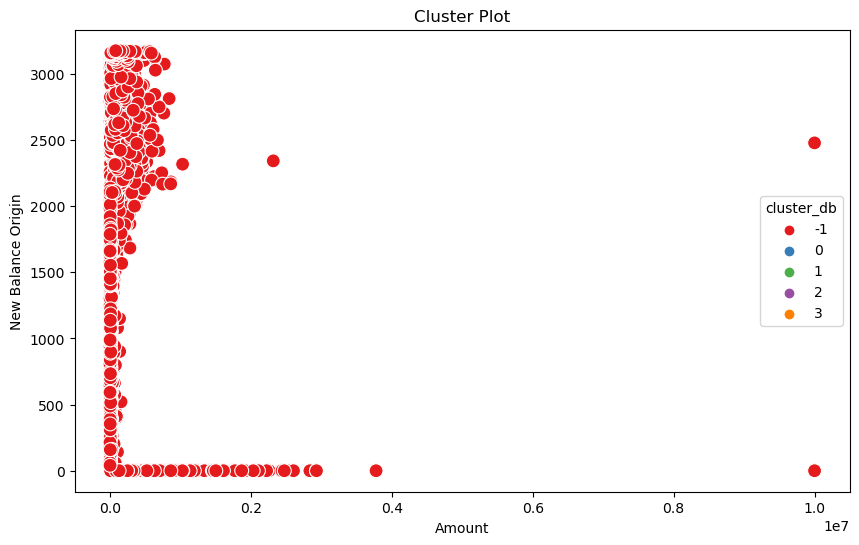

In [129]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='amount', y='newbalanceOrig', hue='cluster_db', palette='Set1', s=100)

# Add titles and labels
plt.title('Cluster Plot')
plt.xlabel('Amount')
plt.ylabel('New Balance Origin')

# Show the plot
plt.show()
